In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt


n=100
beta_0 = 5
beta_1 = 2

np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0,scale=1,size=n)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Text(0, 0.5, 'y')

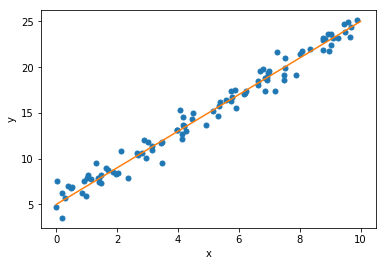

In [2]:
plt.figure()
plt.plot(x,y,"o",ms=5)
xx = np.array([0,10])
plt.plot(xx,beta_0+beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")

In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

In [4]:
print(np.mean(x))
print(np.mean(y))

4.8587792760014565
14.80142786070299


In [5]:
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
print(rss)

81.540007425512


In [10]:
rss = []
slopes = np.arange(-10,15,0.01)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x) **2))
    
ind_min = np.argmin(rss)    
print(ind_min)

1200


In [11]:
print("Estimate foe the slope:",slopes[ind_min])

Estimate foe the slope: 1.9999999999997442


Text(0, 0.5, 'RSS')

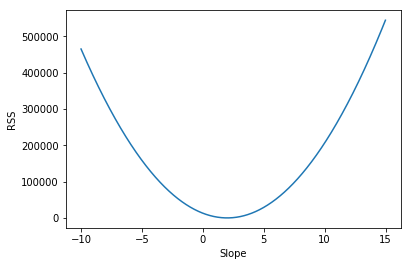

In [12]:
plt.figure()
plt.plot(slopes,rss) 
plt.xlabel("Slope")
plt.ylabel("RSS")

12004


Text(0, 0.5, 'RSS')

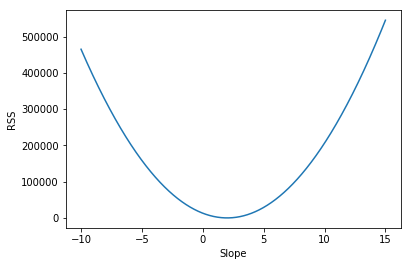

In [13]:
rss = []
slopes = np.arange(-10, 15, 0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x) **2))
    
ind_min = np.argmin(rss)    
print(ind_min)
plt.figure()
plt.plot(slopes,rss) 
plt.xlabel("Slope")
plt.ylabel("RSS")

In [14]:
print("Estimate foe the slope:",slopes[ind_min])

Estimate foe the slope: 2.003999999993347


In [15]:
import statsmodels.api as sm
mod = sm.OLS(y,x)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2974.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.14e-75
Time:                        23:35:02   Log-Likelihood:                -246.89
No. Observations:                 100   AIC:                             495.8
Df Residuals:                      99   BIC:                             498.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7569      0.051     54.538      0.0

In [16]:
X = sm.add_constant(x)
mod = sm.OLS(y,X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           7.47e-82
Time:                        00:02:44   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

In [19]:
print(np.random.seed(1))

None


Text(0.5, 0, '$y$')

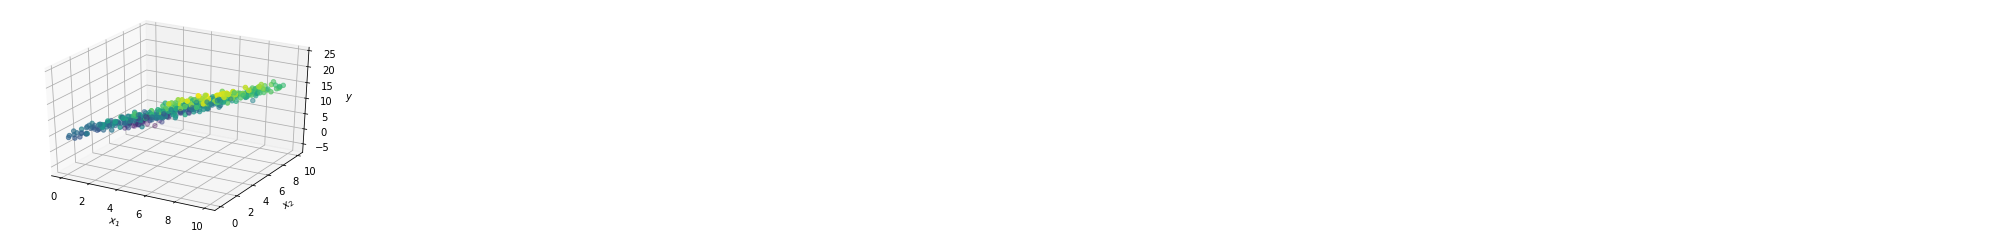

In [26]:
n=500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0,scale=1,size=n)
X = np.stack([x_1,x_2],axis=1)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y,c=y) 
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
lm.intercept_

5.154077763777251

In [30]:
lm.coef_[0]

1.9999378989891403

In [31]:
lm.coef_[1]

-1.0202644869933357

In [33]:
X_0 = np.array([2,4])
#lm.predict(X_0) --> warning  Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

In [34]:
lm.score(X,y)

0.9798997316600129

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train,y_test = train_test_split(X,y,train_size=0.5,random_state=1)
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
lm.score(X_test,y_test)

0.9794930834681773